## 5. The Randomized Benchmarking Protocol 


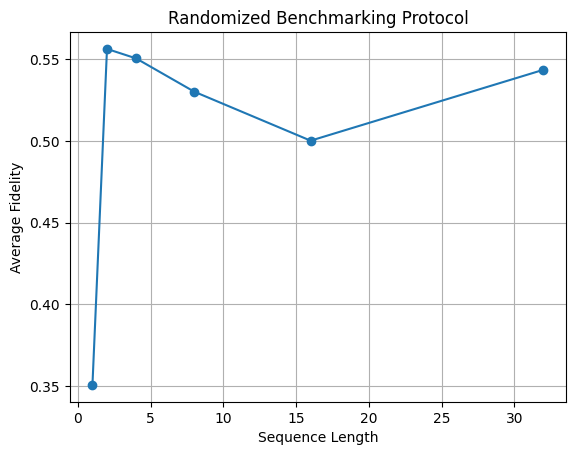

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt

def create_rb_sequence(length, qubit=0):
    """
    Generate a random sequence of single-qubit gates for randomized benchmarking.
    Args:
        length (int): Length of the sequence.
        qubit (int): The qubit to apply the sequence on.
    Returns:
        QuantumCircuit: A circuit with the randomized benchmarking sequence.
    """
    circuit = QuantumCircuit(1)

    # Define the set of single-qubit Clifford-like gates
    gate_set = [circuit.h, circuit.x, circuit.y, circuit.z]

    # Apply a random sequence of gates
    for _ in range(length):
        gate = np.random.choice(gate_set)
        gate(qubit)

    # Add an inversion to bring back to |0⟩ state if possible
    # This effectively serves as the inverse gate (approximation)
    gate_set[-1](qubit)  # Add Z gate as an approximate inversion

    return circuit

def run_rb_protocol(lengths, num_trials=50):
    """
    Run randomized benchmarking protocol for a range of sequence lengths.
    Args:
        lengths (list): List of sequence lengths to test.
        num_trials (int): Number of random sequences per length.
    Returns:
        list: Average fidelity at each sequence length.
    """
    fidelities = []
    simulator = Aer.get_backend('qasm_simulator')

    for length in lengths:
        fidelity_sum = 0

        for _ in range(num_trials):
            # Generate RB sequence for current length
            rb_sequence = create_rb_sequence(length)

            # Prepare the circuit for measurement
            rb_sequence.measure_all()

            # Execute on the simulator (replaced section)
            new_circuit = transpile(rb_sequence, simulator)  # Transpile for simulator
            job = simulator.run(new_circuit, shots=100)
            result = job.result()

            # Fidelity is estimated as the probability of measuring the |0⟩ state
            counts = result.get_counts(rb_sequence)
            fidelity = counts.get('0', 0) / 100  # Probability of ending in |0>
            fidelity_sum += fidelity

        # Average fidelity for this length
        average_fidelity = fidelity_sum / num_trials
        fidelities.append(average_fidelity)

    return fidelities

# Define the sequence lengths and run RB protocol
sequence_lengths = [1, 2, 4, 8, 16, 32]
fidelities = run_rb_protocol(sequence_lengths)

# Plot the results
plt.plot(sequence_lengths, fidelities, marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Average Fidelity')
plt.title('Randomized Benchmarking Protocol')
plt.grid(True)
plt.show()